In [35]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import pickle
import association_metrics as am


In [36]:
pd.set_option('display.max_columns', None)

# Dataset

In [50]:
with open('COVID19MEXICO.pkl', 'rb') as archivo:
    df = pickle.load(archivo)

In [51]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [52]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-09-19,0ed066,2,12,16,2,16,16,41,1,2023-03-09,2023-03-06,9999-99-99,97,2,28,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,1,2,7,99,México,97,97
1,2023-09-19,b4071e,2,12,9,1,9,9,3,1,2023-03-31,2023-03-31,9999-99-99,97,2,73,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
2,2023-09-19,a5442c,2,12,9,1,9,9,4,1,2023-01-12,2023-01-12,9999-99-99,97,2,5,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
3,2023-09-19,dacb2c,2,12,7,1,7,7,108,1,2023-01-19,2023-01-16,9999-99-99,97,2,45,1,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,97,2,97,6,99,México,97,97
4,2023-09-19,6cef7b,2,12,7,1,7,7,108,1,2023-01-16,2023-01-14,9999-99-99,97,2,54,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137994,2023-09-19,m00ee10,2,12,15,2,30,15,33,1,2023-08-30,2023-08-30,9999-99-99,97,99,61,1,97,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,México,97,97
1137995,2023-09-19,m1cc581,2,3,15,1,20,15,999,1,2023-08-30,2023-08-30,9999-99-99,97,99,61,1,2,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,México,97,97
1137996,2023-09-19,m0b0348,2,12,15,1,9,15,999,1,2023-08-30,2023-08-30,9999-99-99,97,99,39,1,2,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,México,97,97
1137997,2023-09-19,m08f43c,2,3,15,2,15,15,999,1,2023-08-31,2023-08-31,9999-99-99,97,99,66,1,97,99,99,1,1,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,México,97,97


In [53]:
df.dtypes

FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES               int64
MUNICIPIO_RES             int64
TIPO_PACIENTE             int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                  int64
NEUMONIA                  int64
EDAD                      int64
NACIONALIDAD              int64
EMBARAZO                  int64
HABLA_LENGUA_INDIG        int64
INDIGENA                  int64
DIABETES                  int64
EPOC                      int64
ASMA                      int64
INMUSUPR                  int64
HIPERTENSION              int64
OTRA_COM                  int64
CARDIOVASCULAR            int64
OBESIDAD                  int64
RENAL_CRONICA             int64
TABAQUISMO                int64
OTRO_CASO                 int64
TOMA_MUE

In [54]:
df.isnull().sum(axis = 0)

FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
MIGRANTE                 0
P

# Limpieza de datos

revisamos duplicados

In [55]:
df.duplicated().sum()

0

Eliminamos las columnas  FECHA_DEF,FECHA_INGRESO, INTUBADO y UCI

In [56]:
df =  df.drop(['FECHA_DEF','FECHA_INGRESO', 'INTUBADO','UCI'], axis = 1)

las columnas FECHA_ACTUALIZACION y ID_REGISTRO se elimina porque no aprtan informacion del paciente, estos datos son sobre el registro 

In [57]:
df =  df.drop(['FECHA_ACTUALIZACION','ID_REGISTRO'], axis = 1)

consideramos que es mejor mantener solo el mes y no la fecha completa

In [58]:
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])
df["MES_SINTOMAS"] = df["FECHA_SINTOMAS"].dt.month
df =  df.drop(['FECHA_SINTOMAS'], axis = 1)

consideramos que los indicadores de TOMA_MUESTRA_ANTIGENO y TOMA_MUESTRA_LAB son redundantes ya que la variable RESULTADO_LAB y RESULTADO_ANTIGENO contiene una categoria para cuando no se toma la muestra

In [59]:
df =  df.drop(['TOMA_MUESTRA_ANTIGENO','TOMA_MUESTRA_LAB'], axis = 1)

revisamos tipos de datos y valores nulos

In [60]:
df.dtypes

ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
INDIGENA                int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO_LAB           int64
RESULTADO_ANTIGENO      int64
CLASIFICACION_FINAL     int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGEN            object
MES_SINTOMAS            int32
dtype: object

hacemos nuestra target a dummy

In [64]:
df.loc[df['TIPO_PACIENTE']== 1,'TIPO_PACIENTE']  = 0
df.loc[df['TIPO_PACIENTE']== 2,'TIPO_PACIENTE']  = 1

revisamos si hay campos no especificados para la target, si los hay se eliminan

In [65]:
df['TIPO_PACIENTE'].describe()

count    1.137999e+06
mean     7.742098e-02
std      2.672584e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: TIPO_PACIENTE, dtype: float64

In [66]:
df.loc[df['TIPO_PACIENTE']== 99]

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,MES_SINTOMAS


In [67]:
df['TIPO_PACIENTE'].value_counts(1)

TIPO_PACIENTE
0    0.922579
1    0.077421
Name: proportion, dtype: float64

vemos que la target no es balanceada, el mayor porcentaje de registros son de pacientes que no se hospitalizaron, ahora damos una revision rapida a los datos

In [68]:
for i in df:
  print(i)
  values = df[i].value_counts(1)
  display(values)
  print("\n")

ORIGEN


ORIGEN
2    0.707139
1    0.292861
Name: proportion, dtype: float64



SECTOR


SECTOR
4     0.536894
12    0.314426
9     0.076382
6     0.049733
3     0.014549
8     0.002559
5     0.002470
13    0.001137
7     0.000633
11    0.000424
10    0.000358
2     0.000257
99    0.000155
1     0.000022
Name: proportion, dtype: float64



ENTIDAD_UM


ENTIDAD_UM
9     0.282709
15    0.073077
11    0.055650
19    0.054474
21    0.035472
22    0.030977
2     0.030257
24    0.029904
7     0.029866
20    0.026471
14    0.025026
30    0.023658
28    0.023563
5     0.022990
17    0.021832
13    0.020234
25    0.020033
26    0.019352
16    0.018926
3     0.016931
31    0.015608
12    0.014750
1     0.014292
27    0.013591
18    0.013430
29    0.011953
8     0.011759
6     0.011040
32    0.010292
23    0.009637
10    0.007999
4     0.004245
Name: proportion, dtype: float64



SEXO


SEXO
1    0.588361
2    0.411639
Name: proportion, dtype: float64



ENTIDAD_NAC


ENTIDAD_NAC
9     0.259743
15    0.094761
11    0.056439
19    0.046097
21    0.037459
30    0.034488
7     0.033208
20    0.030848
24    0.029960
14    0.026461
5     0.023314
25    0.023284
28    0.022629
16    0.022540
12    0.022358
17    0.020802
22    0.020727
26    0.019586
13    0.019503
2     0.017810
31    0.016482
27    0.014830
1     0.014025
18    0.013095
29    0.011930
8     0.011840
32    0.011401
3     0.011133
6     0.009746
10    0.009473
23    0.005304
4     0.004451
99    0.004277
Name: proportion, dtype: float64



ENTIDAD_RES


ENTIDAD_RES
9     0.254280
15    0.096835
11    0.055816
19    0.054396
21    0.035698
22    0.031200
2     0.030467
7     0.030212
24    0.029578
20    0.026846
14    0.025250
30    0.024482
28    0.023596
5     0.023019
17    0.022284
13    0.020714
25    0.019756
26    0.019450
16    0.019352
3     0.016934
31    0.015621
12    0.015320
1     0.014320
27    0.013496
18    0.013443
29    0.012216
8     0.011849
6     0.010981
32    0.010362
23    0.009782
10    0.008182
4     0.004265
Name: proportion, dtype: float64



MUNICIPIO_RES


MUNICIPIO_RES
7      5.255980e-02
5      4.568106e-02
14     3.724081e-02
2      3.669599e-02
10     3.653167e-02
           ...     
289    8.787354e-07
230    8.787354e-07
240    8.787354e-07
249    8.787354e-07
281    8.787354e-07
Name: proportion, Length: 471, dtype: float64



TIPO_PACIENTE


TIPO_PACIENTE
0    0.922579
1    0.077421
Name: proportion, dtype: float64



NEUMONIA


NEUMONIA
2     0.966211
1     0.028711
99    0.005078
Name: proportion, dtype: float64



EDAD


EDAD
29     2.361250e-02
28     2.360108e-02
31     2.328297e-02
30     2.311338e-02
27     2.265116e-02
           ...     
116    1.757471e-06
121    1.757471e-06
141    8.787354e-07
154    8.787354e-07
125    8.787354e-07
Name: proportion, Length: 124, dtype: float64



NACIONALIDAD


NACIONALIDAD
1    0.995732
2    0.004268
Name: proportion, dtype: float64



EMBARAZO


EMBARAZO
2     0.566206
97    0.411639
1     0.017380
98    0.004771
99    0.000004
Name: proportion, dtype: float64



HABLA_LENGUA_INDIG


HABLA_LENGUA_INDIG
2     0.947268
99    0.043968
1     0.008765
Name: proportion, dtype: float64



INDIGENA


INDIGENA
2     0.946444
99    0.042817
1     0.010739
Name: proportion, dtype: float64



DIABETES


DIABETES
2     0.920018
1     0.078937
98    0.001045
Name: proportion, dtype: float64



EPOC


EPOC
2     0.989244
1     0.009805
98    0.000951
Name: proportion, dtype: float64



ASMA


ASMA
2     0.975678
1     0.023410
98    0.000912
Name: proportion, dtype: float64



INMUSUPR


INMUSUPR
2     0.990051
1     0.009061
98    0.000888
Name: proportion, dtype: float64



HIPERTENSION


HIPERTENSION
2     0.889296
1     0.109780
98    0.000924
Name: proportion, dtype: float64



OTRA_COM


OTRA_COM
2     0.975580
1     0.017446
98    0.006974
Name: proportion, dtype: float64



CARDIOVASCULAR


CARDIOVASCULAR
2     0.986266
1     0.012807
98    0.000927
Name: proportion, dtype: float64



OBESIDAD


OBESIDAD
2     0.922642
1     0.076518
98    0.000840
Name: proportion, dtype: float64



RENAL_CRONICA


RENAL_CRONICA
2     0.988032
1     0.011049
98    0.000919
Name: proportion, dtype: float64



TABAQUISMO


TABAQUISMO
2     0.958217
1     0.040819
98    0.000964
Name: proportion, dtype: float64



OTRO_CASO


OTRO_CASO
2     0.849252
1     0.134983
99    0.015765
Name: proportion, dtype: float64



RESULTADO_LAB


RESULTADO_LAB
97    0.815736
2     0.135398
1     0.036615
4     0.010729
3     0.001521
Name: proportion, dtype: float64



RESULTADO_ANTIGENO


RESULTADO_ANTIGENO
2     0.540789
1     0.337322
97    0.121889
Name: proportion, dtype: float64



CLASIFICACION_FINAL


CLASIFICACION_FINAL
7    0.587839
3    0.360521
6    0.043124
1    0.006996
5    0.001385
4    0.000110
2    0.000025
Name: proportion, dtype: float64



MIGRANTE


MIGRANTE
99    0.996544
2     0.002131
1     0.001325
Name: proportion, dtype: float64



PAIS_NACIONALIDAD


PAIS_NACIONALIDAD
México                       9.957320e-01
Estados Unidos de América    8.435860e-04
Venezuela                    5.413010e-04
República de Honduras        3.145873e-04
China                        2.943764e-04
                                 ...     
Austria                      8.787354e-07
República Centro Africana    8.787354e-07
Níger                        8.787354e-07
Marruecos                    8.787354e-07
Bielorrusia                  8.787354e-07
Name: proportion, Length: 102, dtype: float64



PAIS_ORIGEN


PAIS_ORIGEN
97                                      9.986775e-01
Venezuela                               2.495609e-04
República de Honduras                   2.117752e-04
Haití                                   1.291741e-04
Nicaragua                               1.177505e-04
Guatemala                               7.205630e-05
Brasil                                  6.678389e-05
Estados Unidos de América               6.151148e-05
China                                   5.623907e-05
El Salvador                             5.360286e-05
Colombia                                5.184539e-05
Ecuador                                 5.096665e-05
Chile                                   4.569424e-05
Cuba                                    3.690689e-05
Otro                                    2.460459e-05
Afganistán                              1.054482e-05
Perú                                    8.787354e-06
Rusia                                   7.908619e-06
Bolivia                           



MES_SINTOMAS


MES_SINTOMAS
1    0.253411
2    0.177366
3    0.168196
4    0.108278
5    0.098298
8    0.064938
6    0.045913
7    0.042828
9    0.040773
Name: proportion, dtype: float64

algunas variables se pueden normalizar, primero normalizamos la variable de de Sector, aquellos valores menores a .01 se agruparán en otra categoria 

In [69]:
df['SECTOR']=df["SECTOR"].map(lambda 
                                    x: 0 if x== 8 
                                    or x== 5 
                                    or x== 13 
                                    or x== 7
                                    or x== 11
                                    or x== 10
                                    or x== 2
                                    or x== 99
                                    or x== 1
                                    else x)

In [70]:
df['SECTOR'].value_counts(1)

SECTOR
4     0.536894
12    0.314426
9     0.076382
6     0.049733
3     0.014549
0     0.008015
Name: proportion, dtype: float64

Ahora normalizamos ENTIDAD_NAC, ENTIDAD_UM y ENTIDAD_RES

In [71]:
df['ENTIDAD_NAC'] = df['ENTIDAD_NAC'].astype(str)
df['ENTIDAD_UM'] = df['ENTIDAD_UM'].astype(str)
df['ENTIDAD_RES'] = df['ENTIDAD_RES'].astype(str)
diccionario_region = {
    "1": "Centro de Mexico",  # AGUASCALIENTES
    "2": "Norte de Mexico",    # BAJA CALIFORNIA
    "3": "Norte de Mexico",    # BAJA CALIFORNIA SUR
    "4": "Sur de Mexico",      # CAMPECHE
    "5": "Norte de Mexico",    # COAHUILA DE ZARAGOZA
    "6": "Occidente de Mexico", # COLIMA
    "7": "Sur de Mexico",      # CHIAPAS
    "8": "Norte de Mexico",    # CHIHUAHUA
    "9": "Centro de Mexico",   # CIUDAD DE MÉXICO
    "10": "Norte de Mexico",    # DURANGO
    "11": "Centro de Mexico",   # GUANAJUATO
    "12": "Sur de Mexico",      # GUERRERO
    "13": "Centro de Mexico",   # HIDALGO
    "14": "Occidente de Mexico", # JALISCO
    "15": "Centro de Mexico",   # MÉXICO
    "16": "Occidente de Mexico", # MICHOACÁN DE OCAMPO
    "17": "Centro de Mexico",   # MORELOS
    "18": "Occidente de Mexico", # NAYARIT
    "19": "Norte de Mexico",    # NUEVO LEÓN
    "20": "Sur de Mexico",      # OAXACA
    "21": "Bajio de Mexico", # PUEBLA
    "22": "Centro de Mexico",   # QUERÉTARO
    "23": "Sur de Mexico",      # QUINTANA ROO
    "24": "Centro de Mexico",   # SAN LUIS POTOSÍ
    "25": "Norte de Mexico",    # SINALOA
    "26": "Norte de Mexico",    # SONORA
    "27": "Sur de Mexico",      # TABASCO
    "28": "Norte de Mexico",    # TAMAULIPAS
    "29": "Bajio de Mexico", # TLAXCALA
    "30": "Sur de Mexico",      # VERACRUZ DE IGNACIO DE LA LLAVE
    "31": "Sur de Mexico",      # YUCATÁN
    "32": "Norte de Mexico" ,    # ZACATECAS
    "36": 'Estados Unidos',
    "97": "No aplica",
    "98": "Se ignora",
    "99": "No especifico"
}

In [72]:
df["ENTIDAD_NAC"]=df["ENTIDAD_NAC"].replace(diccionario_region)
df["ENTIDAD_UM"]=df["ENTIDAD_UM"].replace(diccionario_region)
df["ENTIDAD_RES"]=df["ENTIDAD_RES"].replace(diccionario_region)

In [73]:
df["ENTIDAD_NAC"].value_counts(1)

ENTIDAD_NAC
Centro de Mexico       0.515959
Norte de Mexico        0.196566
Sur de Mexico          0.161968
Occidente de Mexico    0.071842
Bajio de Mexico        0.049388
No especifico          0.004277
Name: proportion, dtype: float64

In [74]:
df["ENTIDAD_UM"].value_counts(1)

ENTIDAD_UM
Centro de Mexico       0.528675
Norte de Mexico        0.217650
Sur de Mexico          0.137826
Occidente de Mexico    0.068423
Bajio de Mexico        0.047425
Name: proportion, dtype: float64

In [75]:
df["ENTIDAD_RES"].value_counts(1)

ENTIDAD_RES
Centro de Mexico       0.525026
Norte de Mexico        0.218011
Sur de Mexico          0.140023
Occidente de Mexico    0.069026
Bajio de Mexico        0.047914
Name: proportion, dtype: float64

ahora normalizamos la edad

In [76]:
categorizar_edad = lambda edad: "mayores a 60" if edad > 60 else f"{(edad // 10) * 10}-{(edad // 10) * 10 + 9}"
df['EDAD'] = df['EDAD'].apply(categorizar_edad)

In [77]:
df['EDAD'].value_counts(1)

EDAD
30-39           0.205497
20-29           0.201568
40-49           0.164238
mayores a 60    0.136159
50-59           0.135570
0-9             0.078125
10-19           0.068646
60-69           0.010198
Name: proportion, dtype: float64

normalizamos PAIS NACIONALIDAD y PAIS ORIGEN

In [78]:
paises = {
    "Africa": [
        "Argelia", "Angola", "Benín", "Botsuana", "Burkina Faso", "Burundi", "Cabo Verde", 
        "Camerún", "Chad", "Comoras", "Costa de Marfil", "Egipto", "Eritrea", "Etiopía", 
        "Gabón", "Gambia", "Ghana", "Guinea", "Guinea-Bisáu", "Guinea Ecuatorial", 
        "Kenia", "Lesoto", "Liberia", "Libia", "Madagascar", "Malaui", "Malí", "Marruecos", 
        "Mauricio", "Mauritania", "Mozambique", "Namibia", "Níger", "Nigeria", 
        "República Centroafricana", "República del Congo", "República Democrática del Congo", 
        "Ruanda", "Santo Tomé y Príncipe", "Senegal", "Seychelles", "Sierra Leona", "Somalia", 
        "Suazilandia (Esuatini)", "Sudáfrica", "Sudán", "Sudán del Sur", "Tanzania", "Togo", 
        "Túnez", "Uganda", "Yibuti", "Zambia", "Zimbabue","República de Angola","Reino de Swazilandia",
        "República Centro Africana","Congo"
    ],
    "America": [
        "Canadá", "Estados Unidos de América", "México", "Argentina", "Bolivia", "Brasil", "Chile", 
        "Colombia", "Ecuador", "Guyana", "Paraguay", "Perú", "Surinam", "Uruguay", "Venezuela","República de Honduras",
        "Guatemala","Nicaragua","Cuba","Haití","El Salvador","Belice","República de Costa Rica",
        "República de Panamá","República Oriental del Uruguay","Jamaica", "República de Trinidad y Tobago",
        "Estado Libre Asociado de Puerto Rico","República Dominicana","República de Guyana"
    ],
    "Asia": [
        "Afganistán", "Arabia Saudita", "Armenia", "Azerbaiyán", "Bangladés", "Baréin", 
        "Birmania (Myanmar)", "Brunéi", "Bután", "Camboya", "Catar", "China", "Chipre", 
        "Corea del Norte", "Corea del Sur", "Emiratos Árabes Unidos", "Filipinas", 
        "Georgia", "India", "Indonesia", "Irak", "Irán", "Israel", "Japón", "Jordania", 
        "Kazajistán", "Kirguistán", "Kuwait", "Laos", "Líbano", "Malasia", "Maldivas", 
        "Mongolia", "Nepal", "Omán", "Pakistán", "Palestina", "Qatar", "Rusia", "Singapur", 
        "Siria", "Sri Lanka", "Tailandia", "Tayikistán", "Timor Oriental", "Turkmenistán", 
        "Turquía", "Uzbekistán", "Vietnam", "Yemen","República de Corea","Macao","Bangladesh",
        "República Democrática de Corea","Reino Hachemita de Jordania","Iraq","Hong Kong"
    ],
    "Europa": [
        "Albania", "Alemania", "Andorra", "Austria", "Bélgica", "Bielorrusia", 
        "Bosnia y Herzegovina", "Bulgaria", "Chipre", "Croacia", "Dinamarca", 
        "Eslovaquia", "Eslovenia", "España", "Estonia", "Finlandia", "Francia", 
        "Grecia", "Hungría", "Irlanda", "Islandia", "Italia", "Letonia", 
        "Liechtenstein", "Lituania", "Luxemburgo", "Macedonia del Norte", 
        "Malta", "Moldavia", "Mónaco", "Montenegro", "Noruega", "Países Bajos", 
        "Polonia", "Portugal", "Reino Unido", "República Checa", "Rumanía", 
        "Rusia (parte europea)", "San Marino", "Serbia", "Suecia", "Suiza", 
        "Ucrania", "Vaticano","Gran Bretaña (Reino Unido)","Holanda","Rumania","Guyana Francesa",
        "Países de la Ex-Yugoslavia","República Checa y República Eslovaca","El Vaticano"
    ],
    "Oceania": [
        "Australia", "Fiyi", "Islas Marshall", "Islas Salomón","Kiribati","Micronesia","Nauru","Nueva Zelanda","Palau",
        "Papúa Nueva Guinea","Samoa","Tonga","Tuvalu","Vanuatu"],
    "NO APLICA": [
        "97"],
    "SE IGNORA": [
        "98","SE DESCONOCE"],
    "NO ESPECIFICADO": [
        "99","Otro","Zona Neutral"]
}
diccio_continente = {continente:  pais for pais, continentes in paises.items() for continente in continentes}

In [79]:
df["PAIS_NACIONALIDAD"]=df["PAIS_NACIONALIDAD"].replace(diccio_continente)
df["PAIS_ORIGEN"]=df["PAIS_ORIGEN"].replace(diccio_continente)

In [80]:
df["PAIS_NACIONALIDAD"].value_counts(1)

PAIS_NACIONALIDAD
America            0.999102
Asia               0.000484
Europa             0.000196
NO ESPECIFICADO    0.000181
Africa             0.000031
Oceania            0.000004
SE IGNORA          0.000003
Name: proportion, dtype: float64

In [81]:
df["PAIS_ORIGEN"].value_counts(1)

PAIS_ORIGEN
NO APLICA          0.998678
America            0.001187
Asia               0.000083
NO ESPECIFICADO    0.000025
Europa             0.000018
Africa             0.000009
Oceania            0.000002
Name: proportion, dtype: float64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137999 entries, 0 to 1137998
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ORIGEN               1137999 non-null  int64 
 1   SECTOR               1137999 non-null  int64 
 2   ENTIDAD_UM           1137999 non-null  object
 3   SEXO                 1137999 non-null  int64 
 4   ENTIDAD_NAC          1137999 non-null  object
 5   ENTIDAD_RES          1137999 non-null  object
 6   MUNICIPIO_RES        1137999 non-null  int64 
 7   TIPO_PACIENTE        1137999 non-null  int64 
 8   NEUMONIA             1137999 non-null  int64 
 9   EDAD                 1137999 non-null  object
 10  NACIONALIDAD         1137999 non-null  int64 
 11  EMBARAZO             1137999 non-null  int64 
 12  HABLA_LENGUA_INDIG   1137999 non-null  int64 
 13  INDIGENA             1137999 non-null  int64 
 14  DIABETES             1137999 non-null  int64 
 15  EPOC           

# analisis exploratorio 

prueba chi-cuadrada de indeependencia

In [83]:
from scipy.stats import chi2_contingency

for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['TIPO_PACIENTE'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.01:  
        print(f'La variable categórica {col} está relacionada con la target (p-value: {p})')

La variable categórica ORIGEN está relacionada con la target (p-value: 0.0)
La variable categórica SECTOR está relacionada con la target (p-value: 0.0)
La variable categórica ENTIDAD_UM está relacionada con la target (p-value: 0.0)
La variable categórica SEXO está relacionada con la target (p-value: 0.0)
La variable categórica ENTIDAD_NAC está relacionada con la target (p-value: 0.0)
La variable categórica ENTIDAD_RES está relacionada con la target (p-value: 0.0)
La variable categórica MUNICIPIO_RES está relacionada con la target (p-value: 0.0)
La variable categórica TIPO_PACIENTE está relacionada con la target (p-value: 0.0)
La variable categórica NEUMONIA está relacionada con la target (p-value: 0.0)
La variable categórica EDAD está relacionada con la target (p-value: 0.0)
La variable categórica NACIONALIDAD está relacionada con la target (p-value: 9.121857426937027e-06)
La variable categórica EMBARAZO está relacionada con la target (p-value: 0.0)
La variable categórica HABLA_LENGUA_

el resultado dio que todas las variables no son independientes de la target, este resultado es dudoso e investigando se encontró que esto puede deberse a que la target no esta equilibrada

El coeficiente de Cramer's V es una medida de la fuerza de la asociación entre dos variables categóricas. Se utiliza para determinar si existe una relación significativa entre estas variables y cuantificar la magnitud de esa relación. Cramer's V varía entre 0 y 1, donde 0 indica ausencia de asociación y 1 indica una asociación completa.

Es especialmente útil cuando trabajas con variables categóricas y deseas evaluar si hay una relación significativa entre ellas.

Vamos a revisar el coeficiente de Cramer's V para detectar autocolinealidad entre las variables predictoras

In [84]:

df_c=df.copy()
cramersv = am.CramersV(df_c.astype('category')) 
tab = cramersv.fit()
tab

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,MES_SINTOMAS
ORIGEN,1.000000,0.224242,0.172074,0.012112,0.149763,0.169485,0.319301,0.209749,0.145523,0.104066,0.003275,0.034288,0.065095,0.064853,0.042715,0.043283,0.018400,0.028046,0.036838,0.032674,0.035481,0.014983,0.052261,0.013206,0.036189,0.122818,0.174228,0.162726,0.009314,0.012621,0.011306,0.044124
SECTOR,0.224242,1.000000,0.161607,0.031130,0.131115,0.158656,0.285459,0.109222,0.150440,0.074592,0.054183,0.067751,0.202475,0.205801,0.053010,0.029202,0.027930,0.026241,0.057684,0.129749,0.029804,0.052953,0.030322,0.020540,0.232796,0.083655,0.249452,0.126425,0.054668,0.028213,0.023932,0.047399
ENTIDAD_UM,0.172074,0.161607,1.000000,0.016836,0.882572,0.987237,0.669141,0.051024,0.057430,0.028819,0.012064,0.023218,0.132408,0.132760,0.019397,0.016315,0.020252,0.017480,0.025982,0.046461,0.014353,0.020442,0.019605,0.046553,0.065037,0.043560,0.123761,0.133616,0.017991,0.008908,0.013332,0.062514
SEXO,0.012112,0.031130,0.016836,1.000000,0.020978,0.017061,0.044582,0.059004,0.039637,0.102435,0.011878,1.000000,0.009918,0.010146,0.018757,0.008553,0.026863,0.004822,0.021063,0.020532,0.016581,0.032572,0.022664,0.076136,0.025069,0.022849,0.026350,0.022615,0.012580,0.013598,0.007656,0.013558
ENTIDAD_NAC,0.149763,0.131115,0.882572,0.020978,1.000000,0.889299,0.543522,0.048988,0.051457,0.026009,0.998968,0.023632,0.123240,0.123099,0.021041,0.016610,0.020088,0.015569,0.027952,0.041452,0.014199,0.018700,0.019717,0.044129,0.055802,0.042834,0.114298,0.105595,0.634737,0.204585,0.248319,0.051426
ENTIDAD_RES,0.169485,0.158656,0.987237,0.017061,0.889299,1.000000,0.676877,0.053539,0.057854,0.028461,0.011988,0.022775,0.131252,0.131574,0.019124,0.016015,0.019791,0.015625,0.025605,0.046231,0.012362,0.020691,0.018810,0.046544,0.064935,0.044373,0.129103,0.132270,0.017997,0.008797,0.013381,0.062658
MUNICIPIO_RES,0.319301,0.285459,0.669141,0.044582,0.543522,0.676877,1.000000,0.209144,0.591894,0.060007,0.101017,0.054439,0.303294,0.307893,0.049952,0.049935,0.041894,0.046041,0.054025,0.502351,0.043534,0.058712,0.048976,0.058904,0.347983,0.097542,0.219351,0.166444,0.117649,0.028164,0.069936,0.071580
TIPO_PACIENTE,0.209749,0.109222,0.051024,0.059004,0.048988,0.053539,0.209144,1.000000,0.488383,0.282853,0.004185,0.062026,0.024311,0.028953,0.123098,0.132934,0.014922,0.135133,0.112613,0.072455,0.134921,0.006088,0.157297,0.018951,0.061344,0.403228,0.170348,0.114345,0.006708,0.004614,0.006287,0.078647
NEUMONIA,0.145523,0.150440,0.057430,0.039637,0.051457,0.057854,0.591894,0.488383,1.000000,0.131552,0.005310,0.029454,0.236151,0.239168,0.065475,0.080198,0.013789,0.054273,0.062526,0.604659,0.067446,0.010980,0.066403,0.017455,0.401864,0.173837,0.074684,0.050038,0.004744,0.003289,0.004114,0.037341
EDAD,0.104066,0.074592,0.028819,0.102435,0.026009,0.028461,0.060007,0.282853,0.131552,1.000000,0.018035,0.086705,0.026330,0.029324,0.226971,0.129154,0.014108,0.034898,0.274509,0.038005,0.100414,0.083528,0.069764,0.055959,0.032287,0.086501,0.138662,0.075825,0.019288,0.006925,0.011384,0.029086


In [85]:
high = (tab > 0.5 ) & (tab < 1)
significant_correlations = [(tab.index[i], tab.columns[j])
                            for i, j in zip(*high.values.nonzero())]

for var1, var2 in significant_correlations:
    correlation_value = tab.loc[var1, var2]
    print(f'Correlación entre "{var1}" y "{var2}": {correlation_value:.2f}')

Correlación entre "ENTIDAD_UM" y "ENTIDAD_NAC": 0.88
Correlación entre "ENTIDAD_UM" y "ENTIDAD_RES": 0.99
Correlación entre "ENTIDAD_UM" y "MUNICIPIO_RES": 0.67
Correlación entre "SEXO" y "EMBARAZO": 1.00
Correlación entre "ENTIDAD_NAC" y "ENTIDAD_UM": 0.88
Correlación entre "ENTIDAD_NAC" y "ENTIDAD_RES": 0.89
Correlación entre "ENTIDAD_NAC" y "MUNICIPIO_RES": 0.54
Correlación entre "ENTIDAD_NAC" y "NACIONALIDAD": 1.00
Correlación entre "ENTIDAD_NAC" y "MIGRANTE": 0.63
Correlación entre "ENTIDAD_RES" y "ENTIDAD_UM": 0.99
Correlación entre "ENTIDAD_RES" y "ENTIDAD_NAC": 0.89
Correlación entre "ENTIDAD_RES" y "MUNICIPIO_RES": 0.68
Correlación entre "MUNICIPIO_RES" y "ENTIDAD_UM": 0.67
Correlación entre "MUNICIPIO_RES" y "ENTIDAD_NAC": 0.54
Correlación entre "MUNICIPIO_RES" y "ENTIDAD_RES": 0.68
Correlación entre "MUNICIPIO_RES" y "NEUMONIA": 0.59
Correlación entre "MUNICIPIO_RES" y "OTRA_COM": 0.50
Correlación entre "NEUMONIA" y "MUNICIPIO_RES": 0.59
Correlación entre "NEUMONIA" y "OTRA_

In [86]:
significant_correlations

[('ENTIDAD_UM', 'ENTIDAD_NAC'),
 ('ENTIDAD_UM', 'ENTIDAD_RES'),
 ('ENTIDAD_UM', 'MUNICIPIO_RES'),
 ('SEXO', 'EMBARAZO'),
 ('ENTIDAD_NAC', 'ENTIDAD_UM'),
 ('ENTIDAD_NAC', 'ENTIDAD_RES'),
 ('ENTIDAD_NAC', 'MUNICIPIO_RES'),
 ('ENTIDAD_NAC', 'NACIONALIDAD'),
 ('ENTIDAD_NAC', 'MIGRANTE'),
 ('ENTIDAD_RES', 'ENTIDAD_UM'),
 ('ENTIDAD_RES', 'ENTIDAD_NAC'),
 ('ENTIDAD_RES', 'MUNICIPIO_RES'),
 ('MUNICIPIO_RES', 'ENTIDAD_UM'),
 ('MUNICIPIO_RES', 'ENTIDAD_NAC'),
 ('MUNICIPIO_RES', 'ENTIDAD_RES'),
 ('MUNICIPIO_RES', 'NEUMONIA'),
 ('MUNICIPIO_RES', 'OTRA_COM'),
 ('NEUMONIA', 'MUNICIPIO_RES'),
 ('NEUMONIA', 'OTRA_COM'),
 ('NACIONALIDAD', 'ENTIDAD_NAC'),
 ('NACIONALIDAD', 'MIGRANTE'),
 ('NACIONALIDAD', 'PAIS_ORIGEN'),
 ('EMBARAZO', 'SEXO'),
 ('HABLA_LENGUA_INDIG', 'INDIGENA'),
 ('INDIGENA', 'HABLA_LENGUA_INDIG'),
 ('DIABETES', 'EPOC'),
 ('DIABETES', 'ASMA'),
 ('DIABETES', 'INMUSUPR'),
 ('DIABETES', 'HIPERTENSION'),
 ('DIABETES', 'CARDIOVASCULAR'),
 ('DIABETES', 'OBESIDAD'),
 ('DIABETES', 'RENAL_CRONICA

In [87]:
variable_counts = {}

for pair in significant_correlations:
    variable1, variable2 = pair
    variable_counts[variable1] = variable_counts.get(variable1, 0) + 1
    variable_counts[variable2] = variable_counts.get(variable2, 0) + 1

df_counts = pd.DataFrame(list(variable_counts.items()), columns=['Variable', 'Conteo'])


In [88]:
df_counts

,Variable,Conteo
0,ENTIDAD_UM,6
1,ENTIDAD_NAC,10
2,ENTIDAD_RES,6
3,MUNICIPIO_RES,10
4,SEXO,2
5,EMBARAZO,2
6,NACIONALIDAD,6
7,MIGRANTE,6
8,NEUMONIA,4
9,OTRA_COM,4


In [89]:
tab2 = df_counts.merge(tab['TIPO_PACIENTE'].reset_index(), left_on='Variable', right_on='index').sort_values(by = 'TIPO_PACIENTE')
tab2

,Variable,Conteo,index,TIPO_PACIENTE
6,NACIONALIDAD,6,NACIONALIDAD,0.004185
19,OBESIDAD,16,OBESIDAD,0.006088
10,PAIS_ORIGEN,4,PAIS_ORIGEN,0.006287
7,MIGRANTE,6,MIGRANTE,0.006708
15,ASMA,16,ASMA,0.014922
21,TABAQUISMO,16,TABAQUISMO,0.018951
11,HABLA_LENGUA_INDIG,2,HABLA_LENGUA_INDIG,0.024311
12,INDIGENA,2,INDIGENA,0.028953
1,ENTIDAD_NAC,10,ENTIDAD_NAC,0.048988
0,ENTIDAD_UM,6,ENTIDAD_UM,0.051024


In [90]:
tab2.loc[tab2['TIPO_PACIENTE'] <0.13]

,Variable,Conteo,index,TIPO_PACIENTE
6,NACIONALIDAD,6,NACIONALIDAD,0.004185
19,OBESIDAD,16,OBESIDAD,0.006088
10,PAIS_ORIGEN,4,PAIS_ORIGEN,0.006287
7,MIGRANTE,6,MIGRANTE,0.006708
15,ASMA,16,ASMA,0.014922
21,TABAQUISMO,16,TABAQUISMO,0.018951
11,HABLA_LENGUA_INDIG,2,HABLA_LENGUA_INDIG,0.024311
12,INDIGENA,2,INDIGENA,0.028953
1,ENTIDAD_NAC,10,ENTIDAD_NAC,0.048988
0,ENTIDAD_UM,6,ENTIDAD_UM,0.051024


In [91]:
df = df.drop(tab2.loc[tab2['TIPO_PACIENTE'] <0.13,'Variable'], axis = 1)

In [92]:
df

,ORIGEN,SECTOR,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,EPOC,INMUSUPR,CARDIOVASCULAR,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD,MES_SINTOMAS
0,2,12,41,0,2,20-29,2,2,2,2,2,97,2,America,3
1,2,12,3,0,2,mayores a 60,2,2,2,2,2,97,2,America,3
2,2,12,4,0,2,0-9,2,2,2,2,2,97,2,America,1
3,2,12,108,0,2,40-49,2,2,2,2,2,97,97,America,1
4,2,12,108,0,2,50-59,2,2,2,2,2,97,97,America,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137994,2,12,33,0,99,mayores a 60,2,2,2,2,99,97,2,America,8
1137995,2,3,999,0,99,mayores a 60,2,2,2,2,99,97,2,America,8
1137996,2,12,999,0,99,30-39,2,2,2,2,99,97,2,America,8
1137997,2,3,999,0,99,mayores a 60,1,2,2,2,99,97,2,America,8


In [93]:
df_c=df.copy()
cramersv = am.CramersV(df_c.astype('category')) 
tab3 = cramersv.fit()
tab3

,ORIGEN,SECTOR,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,EPOC,INMUSUPR,CARDIOVASCULAR,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD,MES_SINTOMAS
ORIGEN,1.000000,0.224242,0.319301,0.209749,0.145523,0.104066,0.043283,0.028046,0.035481,0.052261,0.036189,0.122818,0.174228,0.012621,0.044124
SECTOR,0.224242,1.000000,0.285459,0.109222,0.150440,0.074592,0.029202,0.026241,0.029804,0.030322,0.232796,0.083655,0.249452,0.028213,0.047399
MUNICIPIO_RES,0.319301,0.285459,1.000000,0.209144,0.591894,0.060007,0.049935,0.046041,0.043534,0.048976,0.347983,0.097542,0.219351,0.028164,0.071580
TIPO_PACIENTE,0.209749,0.109222,0.209144,1.000000,0.488383,0.282853,0.132934,0.135133,0.134921,0.157297,0.061344,0.403228,0.170348,0.004614,0.078647
NEUMONIA,0.145523,0.150440,0.591894,0.488383,1.000000,0.131552,0.080198,0.054273,0.067446,0.066403,0.401864,0.173837,0.074684,0.003289,0.037341
EDAD,0.104066,0.074592,0.060007,0.282853,0.131552,1.000000,0.129154,0.034898,0.100414,0.069764,0.032287,0.086501,0.138662,0.006925,0.029086
EPOC,0.043283,0.029202,0.049935,0.132934,0.080198,0.129154,1.000000,0.612433,0.604521,0.600758,0.083995,0.046652,0.016048,0.004915,0.008339
INMUSUPR,0.028046,0.026241,0.046041,0.135133,0.054273,0.034898,0.612433,1.000000,0.613739,0.618123,0.084557,0.063691,0.027936,0.004080,0.012983
CARDIOVASCULAR,0.035481,0.029804,0.043534,0.134921,0.067446,0.100414,0.604521,0.613739,1.000000,0.627600,0.083843,0.054363,0.019861,0.005961,0.011389
RENAL_CRONICA,0.052261,0.030322,0.048976,0.157297,0.066403,0.069764,0.600758,0.618123,0.627600,1.000000,0.084760,0.057816,0.021959,0.001740,0.010200


In [94]:
high = (tab3 > 0.5 ) & (tab3 < 1)
significant_correlations = [(tab3.index[i], tab3.columns[j])
                            for i, j in zip(*high.values.nonzero())]

for var1, var2 in significant_correlations:
    correlation_value = tab.loc[var1, var2]
    print(f'Correlación entre "{var1}" y "{var2}": {correlation_value:.2f}')

Correlación entre "MUNICIPIO_RES" y "NEUMONIA": 0.59
Correlación entre "NEUMONIA" y "MUNICIPIO_RES": 0.59
Correlación entre "EPOC" y "INMUSUPR": 0.61
Correlación entre "EPOC" y "CARDIOVASCULAR": 0.60
Correlación entre "EPOC" y "RENAL_CRONICA": 0.60
Correlación entre "INMUSUPR" y "EPOC": 0.61
Correlación entre "INMUSUPR" y "CARDIOVASCULAR": 0.61
Correlación entre "INMUSUPR" y "RENAL_CRONICA": 0.62
Correlación entre "CARDIOVASCULAR" y "EPOC": 0.60
Correlación entre "CARDIOVASCULAR" y "INMUSUPR": 0.61
Correlación entre "CARDIOVASCULAR" y "RENAL_CRONICA": 0.63
Correlación entre "RENAL_CRONICA" y "EPOC": 0.60
Correlación entre "RENAL_CRONICA" y "INMUSUPR": 0.62
Correlación entre "RENAL_CRONICA" y "CARDIOVASCULAR": 0.63


In [95]:
df = df.drop(['MUNICIPIO_RES','EPOC','CARDIOVASCULAR'], axis = 1)

In [96]:
df_c=df.copy()
cramersv = am.CramersV(df_c.astype('category')) 
tab4 = cramersv.fit()
tab4

,ORIGEN,SECTOR,TIPO_PACIENTE,NEUMONIA,EDAD,INMUSUPR,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD,MES_SINTOMAS
ORIGEN,1.000000,0.224242,0.209749,0.145523,0.104066,0.028046,0.052261,0.036189,0.122818,0.174228,0.012621,0.044124
SECTOR,0.224242,1.000000,0.109222,0.150440,0.074592,0.026241,0.030322,0.232796,0.083655,0.249452,0.028213,0.047399
TIPO_PACIENTE,0.209749,0.109222,1.000000,0.488383,0.282853,0.135133,0.157297,0.061344,0.403228,0.170348,0.004614,0.078647
NEUMONIA,0.145523,0.150440,0.488383,1.000000,0.131552,0.054273,0.066403,0.401864,0.173837,0.074684,0.003289,0.037341
EDAD,0.104066,0.074592,0.282853,0.131552,1.000000,0.034898,0.069764,0.032287,0.086501,0.138662,0.006925,0.029086
INMUSUPR,0.028046,0.026241,0.135133,0.054273,0.034898,1.000000,0.618123,0.084557,0.063691,0.027936,0.004080,0.012983
RENAL_CRONICA,0.052261,0.030322,0.157297,0.066403,0.069764,0.618123,1.000000,0.084760,0.057816,0.021959,0.001740,0.010200
OTRO_CASO,0.036189,0.232796,0.061344,0.401864,0.032287,0.084557,0.084760,1.000000,0.050611,0.057739,0.010881,0.042119
RESULTADO_LAB,0.122818,0.083655,0.403228,0.173837,0.086501,0.063691,0.057816,0.050611,1.000000,0.360450,0.020366,0.104353
RESULTADO_ANTIGENO,0.174228,0.249452,0.170348,0.074684,0.138662,0.027936,0.021959,0.057739,0.360450,1.000000,0.033303,0.089522


In [97]:
high = (tab4 > 0.5 ) & (tab4 < 1)
significant_correlations = [(tab4.index[i], tab4.columns[j])
                            for i, j in zip(*high.values.nonzero())]

for var1, var2 in significant_correlations:
    correlation_value = tab.loc[var1, var2]
    print(f'Correlación entre "{var1}" y "{var2}": {correlation_value:.2f}')

Correlación entre "INMUSUPR" y "RENAL_CRONICA": 0.62
Correlación entre "RENAL_CRONICA" y "INMUSUPR": 0.62


In [98]:
df = df.drop(['INMUSUPR'], axis = 1) 

In [99]:
df

,ORIGEN,SECTOR,TIPO_PACIENTE,NEUMONIA,EDAD,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD,MES_SINTOMAS
0,2,12,0,2,20-29,2,2,97,2,America,3
1,2,12,0,2,mayores a 60,2,2,97,2,America,3
2,2,12,0,2,0-9,2,2,97,2,America,1
3,2,12,0,2,40-49,2,2,97,97,America,1
4,2,12,0,2,50-59,2,2,97,97,America,1
...,...,...,...,...,...,...,...,...,...,...,...
1137994,2,12,0,99,mayores a 60,2,99,97,2,America,8
1137995,2,3,0,99,mayores a 60,2,99,97,2,America,8
1137996,2,12,0,99,30-39,2,99,97,2,America,8
1137997,2,3,0,99,mayores a 60,2,99,97,2,America,8


# Análisis exploratorio

In [100]:
import matplotlib.pyplot as plt
def graf_barras(x,y):
    cross = pd.crosstab(df[x], df[y], normalize='index')

    colores = ['#ffc8a2', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2']

    ax = cross.plot(kind='bar', stacked=True, figsize=(9, 6), color = colores)

    plt.xlabel(x)
    plt.ylabel('Proporción')
    plt.title('Gráfico de Barras para ' + x + ' y ' + y )
    ax.legend(title= y, loc='upper left', bbox_to_anchor=(1, 1))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

    plt.show()

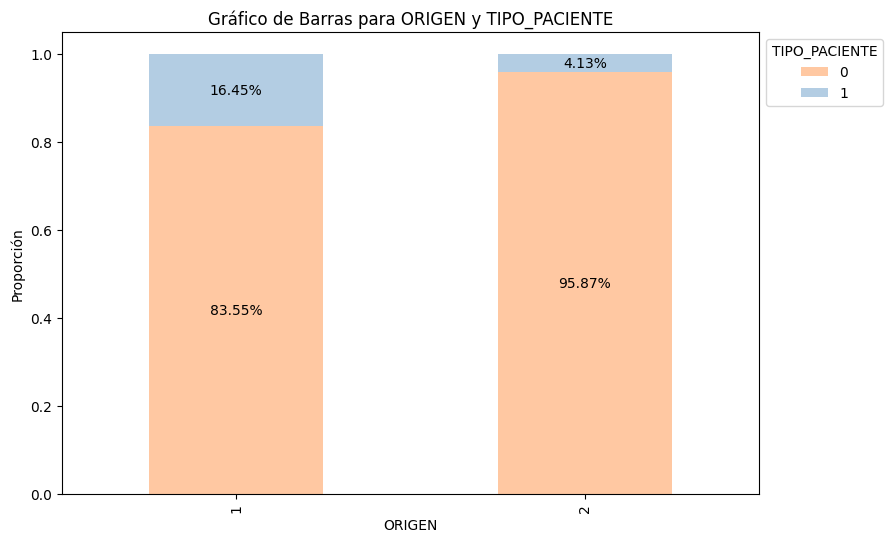

In [101]:
graf_barras('ORIGEN','TIPO_PACIENTE')

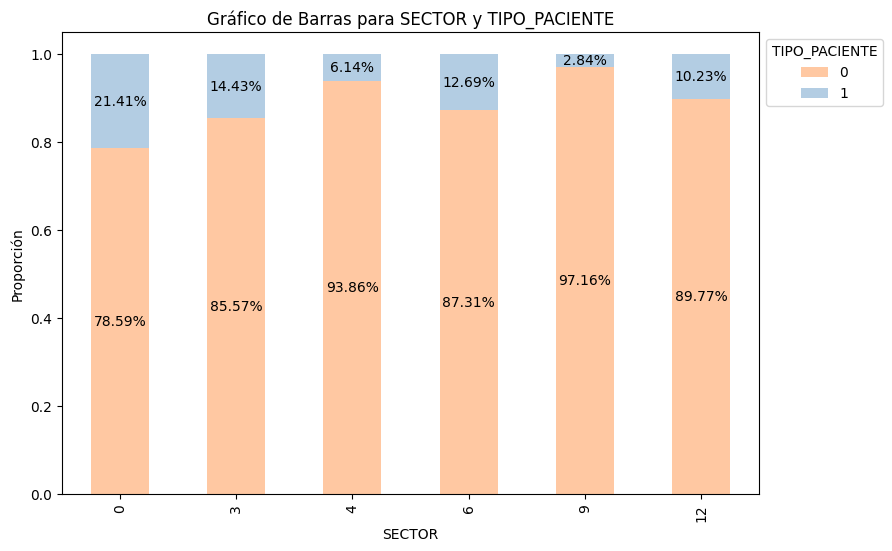

In [102]:
graf_barras('SECTOR','TIPO_PACIENTE')

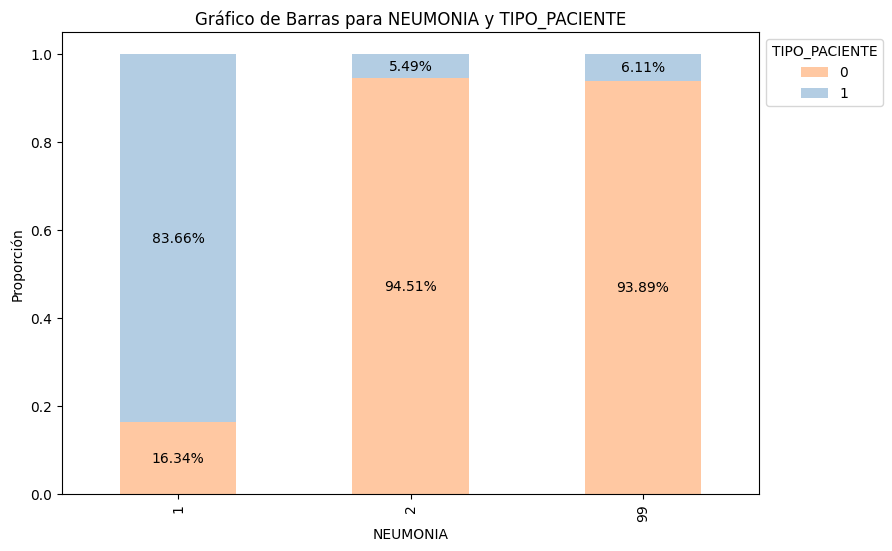

In [103]:
graf_barras('NEUMONIA','TIPO_PACIENTE')

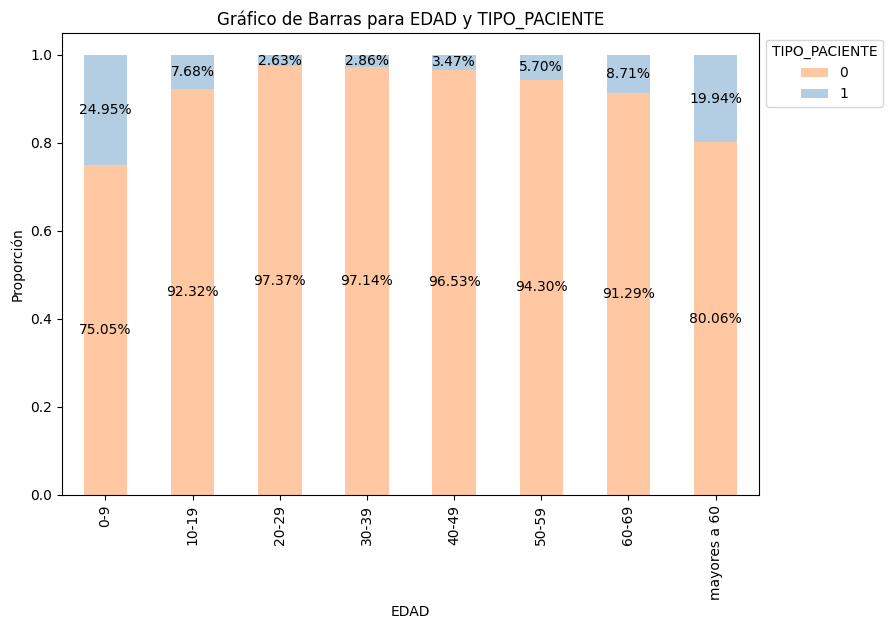

In [104]:
graf_barras('EDAD','TIPO_PACIENTE')

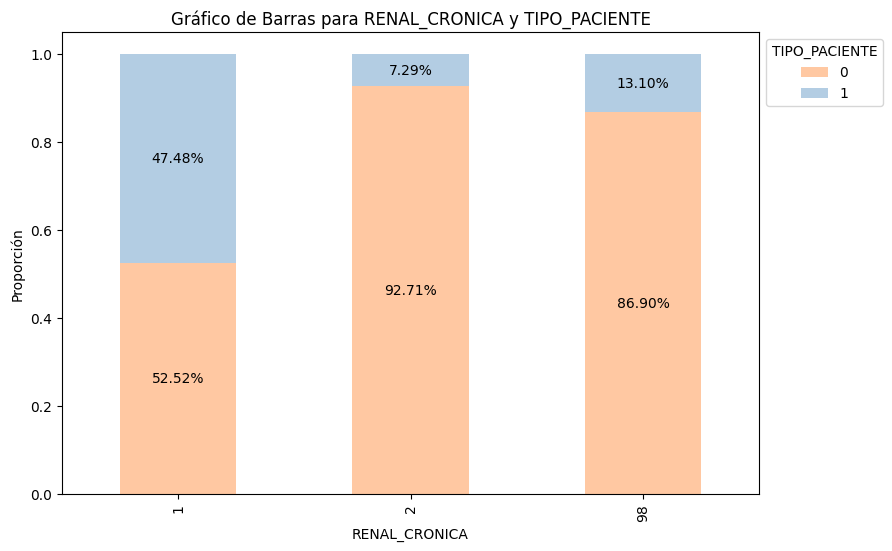

In [105]:
graf_barras('RENAL_CRONICA','TIPO_PACIENTE')

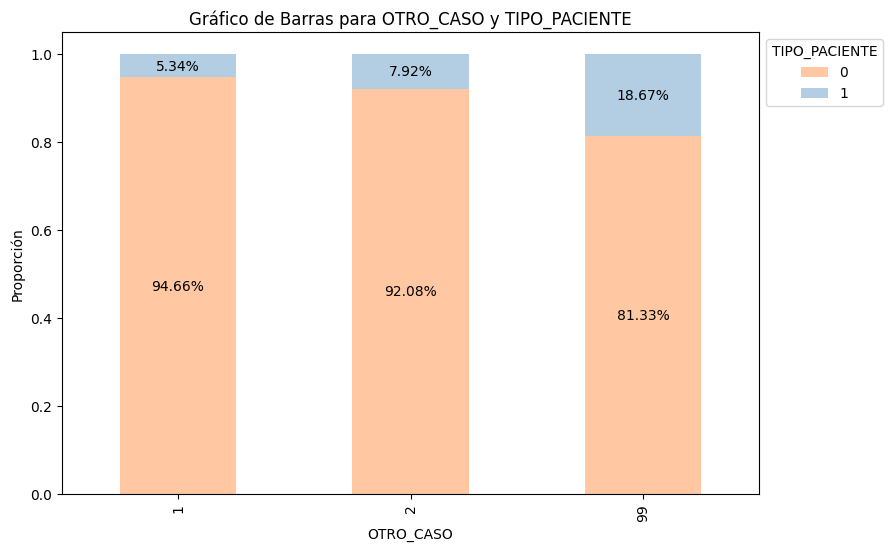

In [106]:
graf_barras('OTRO_CASO','TIPO_PACIENTE')

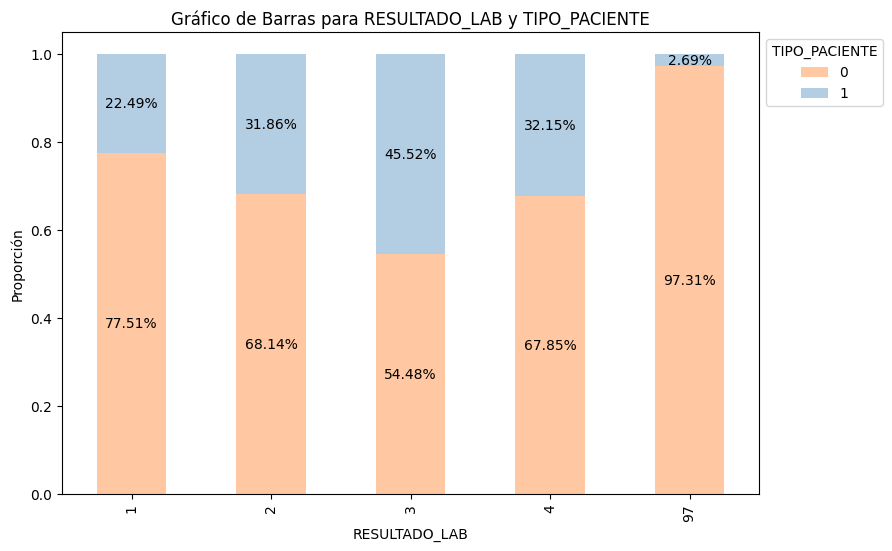

In [107]:
graf_barras('RESULTADO_LAB','TIPO_PACIENTE')

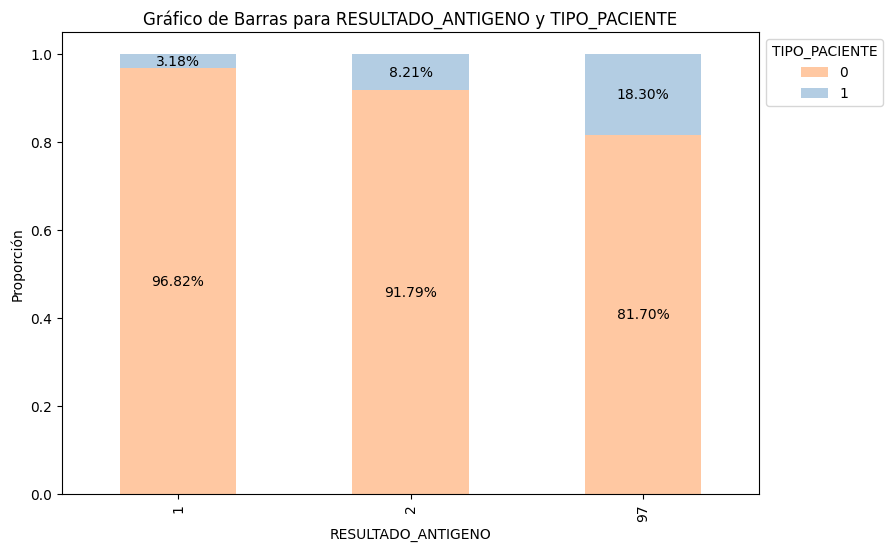

In [108]:
graf_barras('RESULTADO_ANTIGENO','TIPO_PACIENTE')

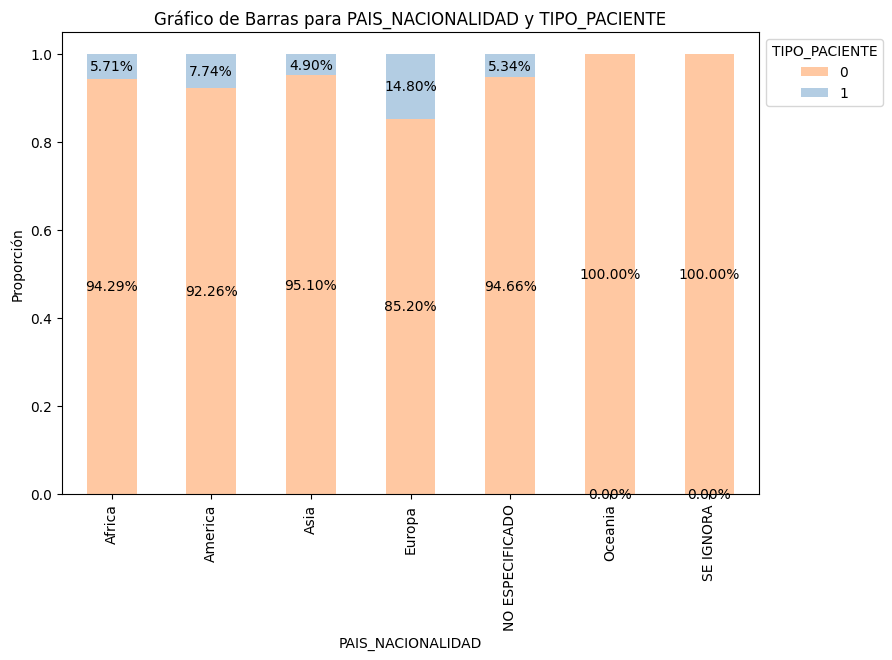

In [109]:
graf_barras('PAIS_NACIONALIDAD','TIPO_PACIENTE')

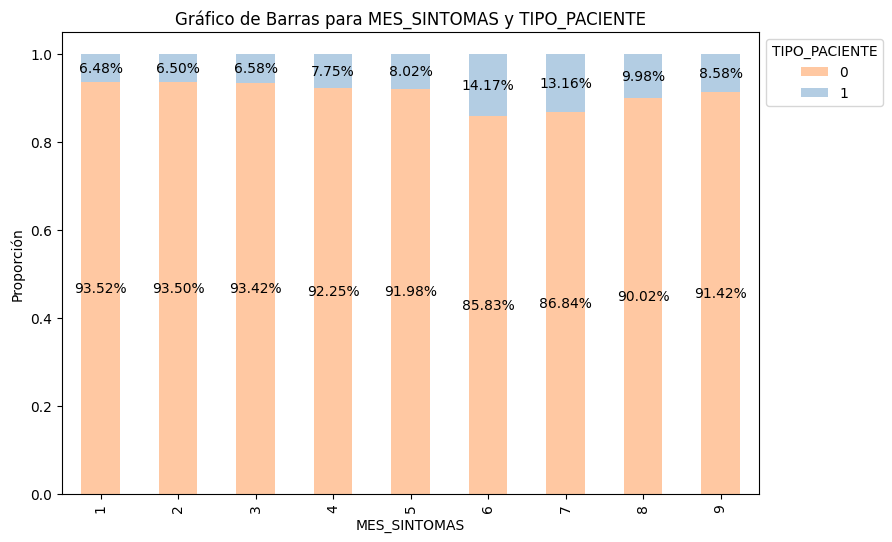

In [110]:
graf_barras('MES_SINTOMAS','TIPO_PACIENTE')

# Ingenieria de variables

consideramos que la variable de mes de sintomas nos ayuda a ver en los mese anteriores, en cuales hubo mayor casos de hospitalizados, sin embargo la naturaleza de los datos no es estacional, por lo tanto consideramos que no nos puede ayudar a determinar en un futuro en que meses puede haber más casos, por tal motivo consideramos que es mejor eliminarla

In [111]:
df = df.drop(['MES_SINTOMAS'], axis = 1) 

las variables  ORIGEN,SECTOR, NEUMONIA	, RENAL_CRONICA	, OTRO_CASO, RESULTADO_LAB	,RESULTADO_ANTIGENO,  contienen codigos, se pasaran a char y luego se obtendran las variables dummy

In [112]:
df[['ORIGEN','SECTOR','NEUMONIA','RENAL_CRONICA','OTRO_CASO','RESULTADO_LAB','RESULTADO_ANTIGENO']] = df[['ORIGEN','SECTOR','NEUMONIA','RENAL_CRONICA','OTRO_CASO','RESULTADO_LAB','RESULTADO_ANTIGENO']].astype('O')

In [113]:
df.dtypes

ORIGEN                object
SECTOR                object
TIPO_PACIENTE          int64
NEUMONIA              object
EDAD                  object
RENAL_CRONICA         object
OTRO_CASO             object
RESULTADO_LAB         object
RESULTADO_ANTIGENO    object
PAIS_NACIONALIDAD     object
dtype: object

In [127]:
from sklearn.model_selection import train_test_split
df= df.sort_index()
X = df.drop('TIPO_PACIENTE',axis=1)
y = df['TIPO_PACIENTE']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.7,
                                                    random_state=333,
                                                    shuffle=True,
                                                    stratify = df['TIPO_PACIENTE'])

In [129]:
X_train

,ORIGEN,SECTOR,NEUMONIA,EDAD,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD
839548,1,4,2,20-29,2,2,97,2,America
367136,2,4,2,0-9,2,2,97,2,America
239689,2,4,2,20-29,2,2,97,1,America
785836,2,4,2,20-29,2,1,1,2,America
419659,2,4,2,20-29,2,2,97,2,America
...,...,...,...,...,...,...,...,...,...
589992,2,4,2,40-49,2,2,97,2,America
9142,2,12,2,50-59,2,2,97,2,America
213101,2,4,2,20-29,2,2,97,1,America
714311,1,4,2,mayores a 60,2,2,97,1,America


In [131]:
y_train = y_train.reset_index(drop=True)

In [117]:
X_test

,ORIGEN,SECTOR,NEUMONIA,EDAD,RENAL_CRONICA,OTRO_CASO,RESULTADO_LAB,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD
507660,2,12,2,30-39,2,2,4,2,America
674947,1,4,2,20-29,2,2,97,2,America
268165,2,12,2,40-49,2,2,2,2,America
763507,2,9,2,30-39,2,2,2,97,America
785,1,12,2,40-49,2,2,97,1,America
...,...,...,...,...,...,...,...,...,...
927002,1,6,2,20-29,2,2,97,2,America
185643,2,4,2,40-49,2,2,97,1,America
1118133,1,12,1,mayores a 60,2,2,1,2,America
31461,2,12,2,0-9,2,1,97,1,America


In [132]:
y_test = y_test.reset_index(drop=True)

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['ORIGEN','SECTOR','NEUMONIA','EDAD','RENAL_CRONICA','OTRO_CASO','RESULTADO_LAB','RESULTADO_ANTIGENO','PAIS_NACIONALIDAD']
preprocessor = ColumnTransformer(
    transformers=[
        ('OH', OneHotEncoder(sparse=False,drop='first'), categorical_cols)],  
    remainder='passthrough')  

X_train2 = preprocessor.fit_transform(X_train)
X_test2 = preprocessor.transform(X_test)

/home/luis/Documentos/formacion/Diplomado Ciencia de datos/env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [120]:
X_train2

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [121]:
column_names = preprocessor.named_transformers_['OH'].get_feature_names_out(input_features=categorical_cols)
column_names = list(column_names) 
X_train2 = pd.DataFrame(X_train2, columns=column_names)
X_test2 = pd.DataFrame(X_test2, columns=column_names)
X_train2

,ORIGEN_2,SECTOR_3,SECTOR_4,SECTOR_6,SECTOR_9,SECTOR_12,NEUMONIA_2,NEUMONIA_99,EDAD_10-19,EDAD_20-29,EDAD_30-39,EDAD_40-49,EDAD_50-59,EDAD_60-69,EDAD_mayores a 60,RENAL_CRONICA_2,RENAL_CRONICA_98,OTRO_CASO_2,OTRO_CASO_99,RESULTADO_LAB_2,RESULTADO_LAB_3,RESULTADO_LAB_4,RESULTADO_LAB_97,RESULTADO_ANTIGENO_2,RESULTADO_ANTIGENO_97,PAIS_NACIONALIDAD_America,PAIS_NACIONALIDAD_Asia,PAIS_NACIONALIDAD_Europa,PAIS_NACIONALIDAD_NO ESPECIFICADO,PAIS_NACIONALIDAD_Oceania,PAIS_NACIONALIDAD_SE IGNORA
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796594,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
796595,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
796596,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
796597,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Modelado

In [163]:

from scipy import stats

def calcular_significancia_regresion_logistica(X_train, y_train, X_test, y_test,umbral_significancia=0.05):
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)


    print(f'Métricas en el conjunto de entrenamiento:')
    print(f'Precisión: {precision_train:.2f}')
    print(f'Recall: {recall_train:.2f}')
    print(f'F1-Score: {f1_train:.2f}')
    
    print(f'\nMétricas en el conjunto de prueba:')
    print(f'Precisión: {precision_test:.2f}')
    print(f'Recall: {recall_test:.2f}')
    print(f'F1-Score: {f1_test:.2f}')

    coeficientes = np.concatenate([model.intercept_, model.coef_[0]])

    X_train_const = np.column_stack([np.ones(X_train.shape[0]), X_train])

    # Calcular el error cuadrático medio de los residuos
    mse_residuos = np.mean((y_train - model.predict(X_train)) ** 2)

    # Calcular la matriz de covarianza
    var_covar = np.linalg.inv(np.dot(X_train_const.T, X_train_const) * mse_residuos)

    # Calcular los errores estándar
    errores_estandar = np.sqrt(np.diag(var_covar))

    # Calcular las estadísticas de prueba z
    estadisticas_prueba = coeficientes / errores_estandar

    # Calcular los p-valores
    p_valores = 2 * (1 - stats.norm.cdf(np.abs(estadisticas_prueba)))

    nombres_variables = X_train.columns.tolist()

    resultados = pd.DataFrame({
        "Variable": ["Intercepto"] + nombres_variables,
        "Coeficiente": coeficientes,
        "P-valor": p_valores
    })

    variables_significativas = resultados[resultados["P-valor"] < umbral_significancia]["Variable"].tolist()

    return variables_significativas, resultados, model

variables_significativas, resultados, model1 = calcular_significancia_regresion_logistica(X_train2, y_train, X_test2, y_test)
print("\nVariables significativas:")
print(variables_significativas)
print("\nResultados completos:")
print(resultados)



/home/luis/Documentos/formacion/Diplomado Ciencia de datos/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métricas en el conjunto de entrenamiento:
Precisión: 0.80
Recall: 0.46
F1-Score: 0.58

Métricas en el conjunto de prueba:
Precisión: 0.81
Recall: 0.46
F1-Score: 0.59

Variables significativas:
['Intercepto', 'ORIGEN_2', 'SECTOR_4', 'SECTOR_9', 'SECTOR_12', 'NEUMONIA_2', 'NEUMONIA_99', 'EDAD_10-19', 'EDAD_20-29', 'EDAD_30-39', 'EDAD_40-49', 'EDAD_50-59', 'EDAD_60-69', 'RENAL_CRONICA_2', 'RENAL_CRONICA_98', 'OTRO_CASO_2', 'OTRO_CASO_99', 'RESULTADO_LAB_2', 'RESULTADO_LAB_3', 'RESULTADO_LAB_4', 'RESULTADO_LAB_97', 'RESULTADO_ANTIGENO_2', 'RESULTADO_ANTIGENO_97']

Resultados completos:
                             Variable  Coeficiente       P-valor
0                          Intercepto     3.934532  1.059530e-05
1                            ORIGEN_2    -1.030435  0.000000e+00
2                            SECTOR_3    -0.094954  1.731991e-01
3                            SECTOR_4    -0.388976  4.904965e-12
4                            SECTOR_6     0.015760  7.925564e-01
5                    